In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import warnings
warnings.filterwarnings('ignore')
import calendar
import datetime

In [2]:
plt.rc("axes.spines", top=False, right=False)

In [3]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [9]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Let's combine these datasets in one dataframe for it will be helpful in some cases!

In [10]:
data = pd.merge(sales,features,on=['Store','Date','IsHoliday'],how='left')
data = pd.merge(data,stores,on=['Store'],how='left')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [150]:
data['Date'] = pd.to_datetime(data['Date'])

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


Keeping both kinds could be helpful in some cases!

In [391]:
data_noNan = data.fillna(-999)
data_noNan.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,-999.0,-999.0,-999.0,-999.0,-999.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,-999.0,-999.0,-999.0,-999.0,-999.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,-999.0,-999.0,-999.0,-999.0,-999.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,-999.0,-999.0,-999.0,-999.0,-999.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,-999.0,-999.0,-999.0,-999.0,-999.0,211.350143,8.106,A,151315


In [365]:
cols = []
for i in range(1,6):
    cols.append('MarkDown%s' % i)

data_sub = data[cols]

In [367]:
len(data_sub)

421570

In [371]:
len(data_sub) - len(data_sub.dropna(how = 'all'))

270138

In [372]:
len(data_sub) - len(data_sub.dropna(how = 'any'))

324514

In [ ]:
data_sub.apply(x: )

In [12]:
data.duplicated().sum()

0

Let's plot some of the basic numerals and notice their varience over time!

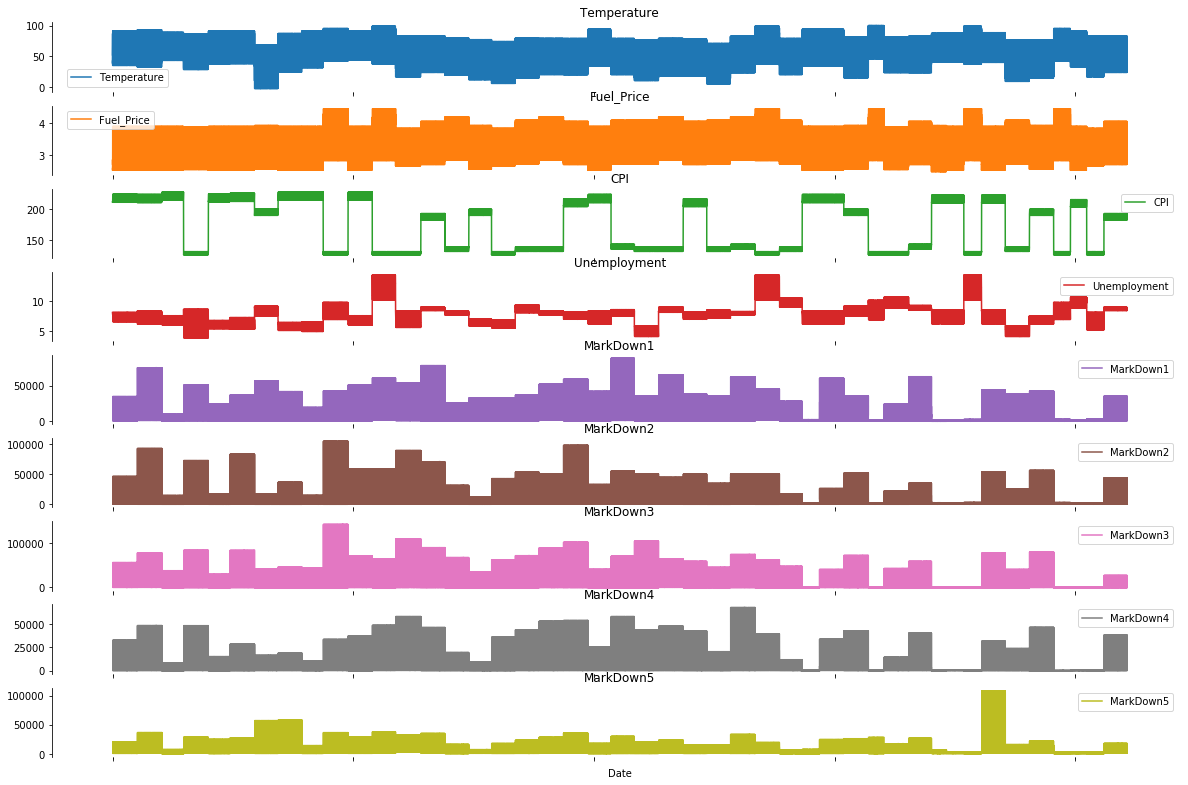

In [13]:
data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, 
    figsize=(20,15),title=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
sns.despine(offset=10,bottom=True)
plt.show()

The change spectrum of all Markdowns are pretty much similar! though the intensity varies!

###### Let's look at the distribution of  numeral columns in dataset!

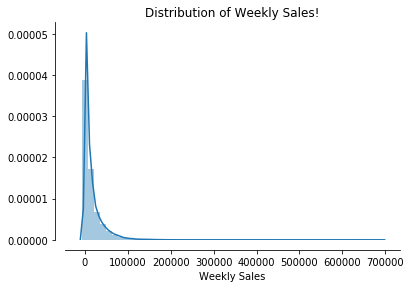

In [167]:
sns.distplot(data['Weekly_Sales'].dropna())
sns.despine(offset=10)
plt.title("Distribution of Weekly Sales!")
plt.xlabel('Weekly Sales')
plt.show()

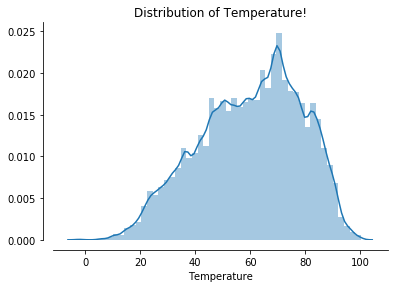

In [170]:
sns.distplot(data['Temperature'].dropna())
sns.despine(offset=10)
plt.title("Distribution of Temperature!")
plt.xlabel('Temperature')
plt.show()

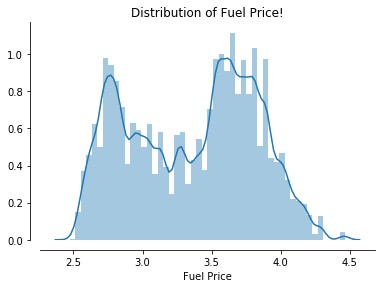

In [171]:
sns.distplot(data['Fuel_Price'].dropna())
sns.despine(offset=10)
plt.title("Distribution of Fuel Price!")
plt.xlabel('Fuel Price')
plt.show()

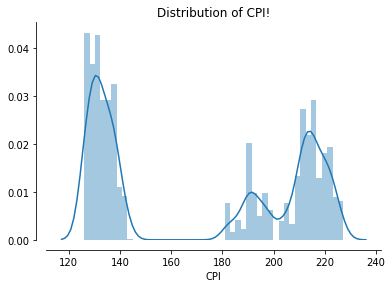

In [172]:
sns.distplot(data['CPI'].dropna())
sns.despine(offset=10)
plt.title("Distribution of CPI!")
plt.xlabel('CPI')
plt.show()

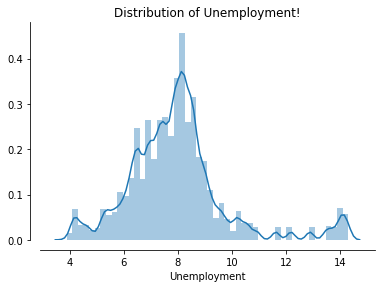

In [173]:
sns.distplot(data['Unemployment'].dropna())
sns.despine(offset=10)
plt.title("Distribution of Unemployment!")
plt.xlabel('Unemployment')
plt.show()

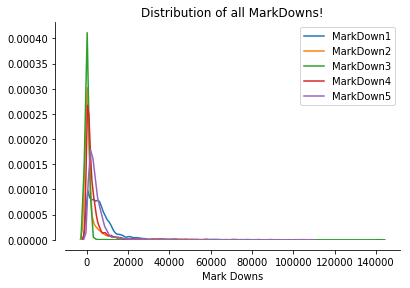

In [392]:
sns.distplot(data['MarkDown1'].dropna(),hist=False,label='MarkDown1')
sns.distplot(data['MarkDown2'].dropna(),hist=False,label='MarkDown2')
sns.distplot(data['MarkDown3'].dropna(),hist=False,label='MarkDown3')
sns.distplot(data['MarkDown4'].dropna(),hist=False,label='MarkDown4')
sns.distplot(data['MarkDown5'].dropna(),hist=False,label='MarkDown5')
sns.despine(offset=10)
plt.xlabel('Mark Downs')
plt.title("Distribution of all MarkDowns!")
plt.show()

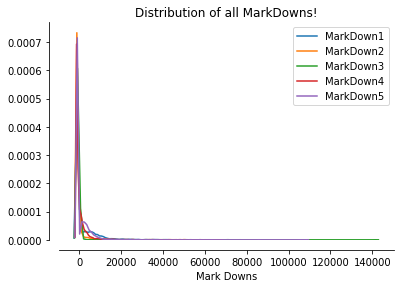

In [393]:
sns.distplot(data_noNan['MarkDown1'].dropna(),hist=False,label='MarkDown1')
sns.distplot(data_noNan['MarkDown2'].dropna(),hist=False,label='MarkDown2')
sns.distplot(data_noNan['MarkDown3'].dropna(),hist=False,label='MarkDown3')
sns.distplot(data_noNan['MarkDown4'].dropna(),hist=False,label='MarkDown4')
sns.distplot(data_noNan['MarkDown5'].dropna(),hist=False,label='MarkDown5')
sns.despine(offset=10)
plt.xlabel('Mark Downs')
plt.title("Distribution of all MarkDowns!")
plt.show()

As Markdown values were added after November 2011, their distribution would be accurate if we code keeping this important detail in mind.

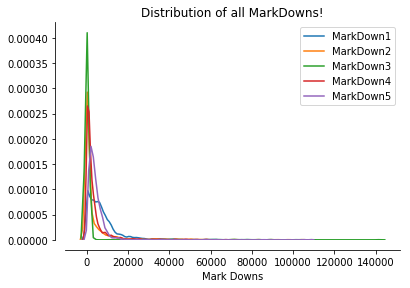

In [413]:
data_markdown = data[data['Date'] > datetime.date(2011,11,1)]
sns.distplot(data_markdown['MarkDown1'].dropna(),hist=False,label='MarkDown1')
sns.distplot(data_markdown['MarkDown2'].dropna(),hist=False,label='MarkDown2')
sns.distplot(data_markdown['MarkDown3'].dropna(),hist=False,label='MarkDown3')
sns.distplot(data_markdown['MarkDown4'].dropna(),hist=False,label='MarkDown4')
sns.distplot(data_markdown['MarkDown5'].dropna(),hist=False,label='MarkDown5')
sns.despine(offset=10)
plt.xlabel('Mark Downs')
plt.title("Distribution of all MarkDowns!")
plt.show()

There is a visible change in distribution if we drop NaNs or if fill them with an orbitrary value i.e. -999

Let's look at the **distributions** of MarkDowns and their **inter correlation & correlation with Weekly Sales.**

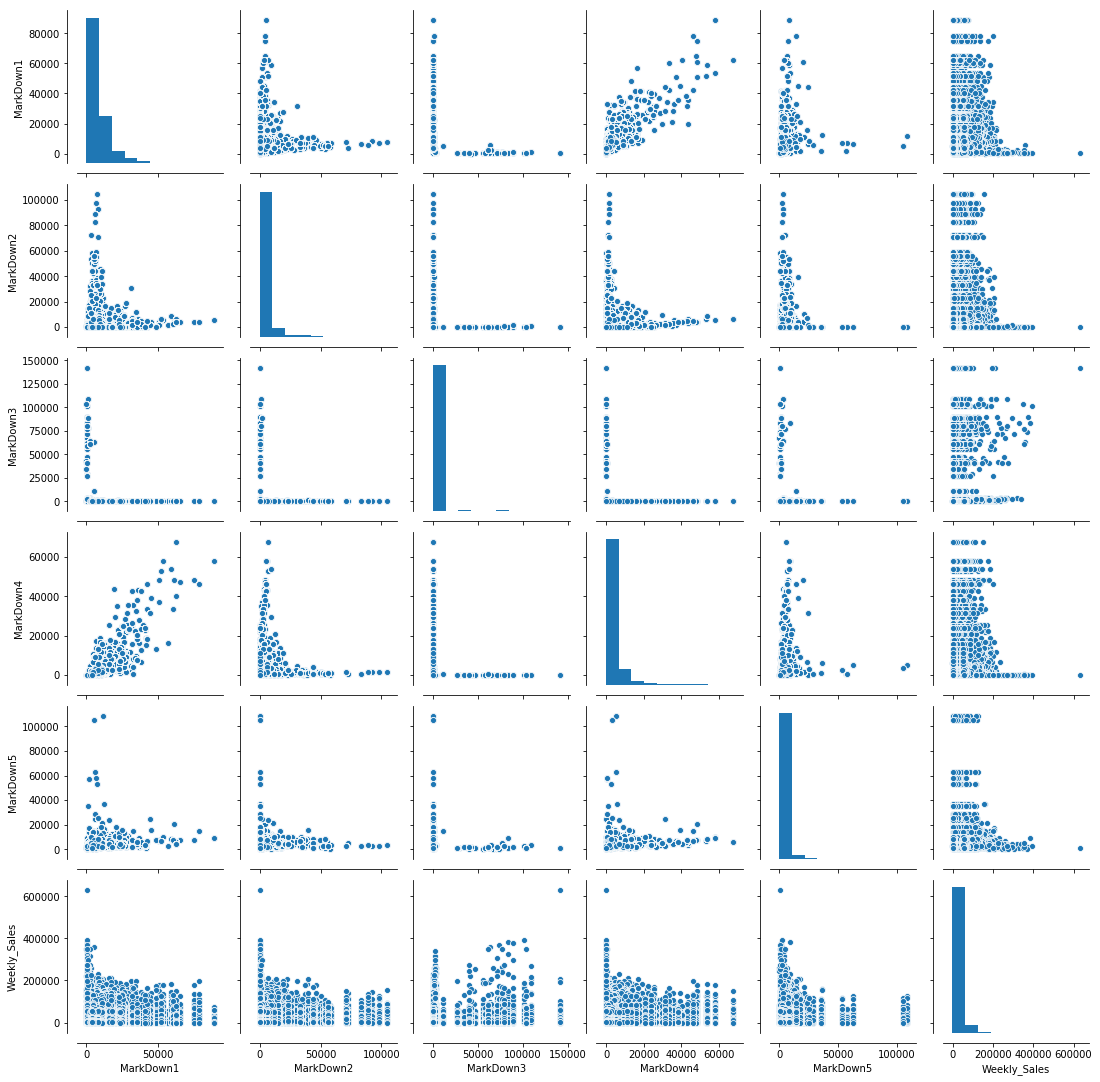

In [416]:
tmp_data = data_markdown[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']]
tmp_data = tmp_data.dropna()
tmp_data.sort_values('MarkDown1')
sns.pairplot(tmp_data)
sns.despine(offset=10)
plt.show()

The general trend for all markdowns except for MarkDown3 is the gradual decrease in sale as the value of markdown increases! Of course there are little tips too on the way

Just out of curosity! I'm also plotting data where NaNs were replaced by -999. To compare!

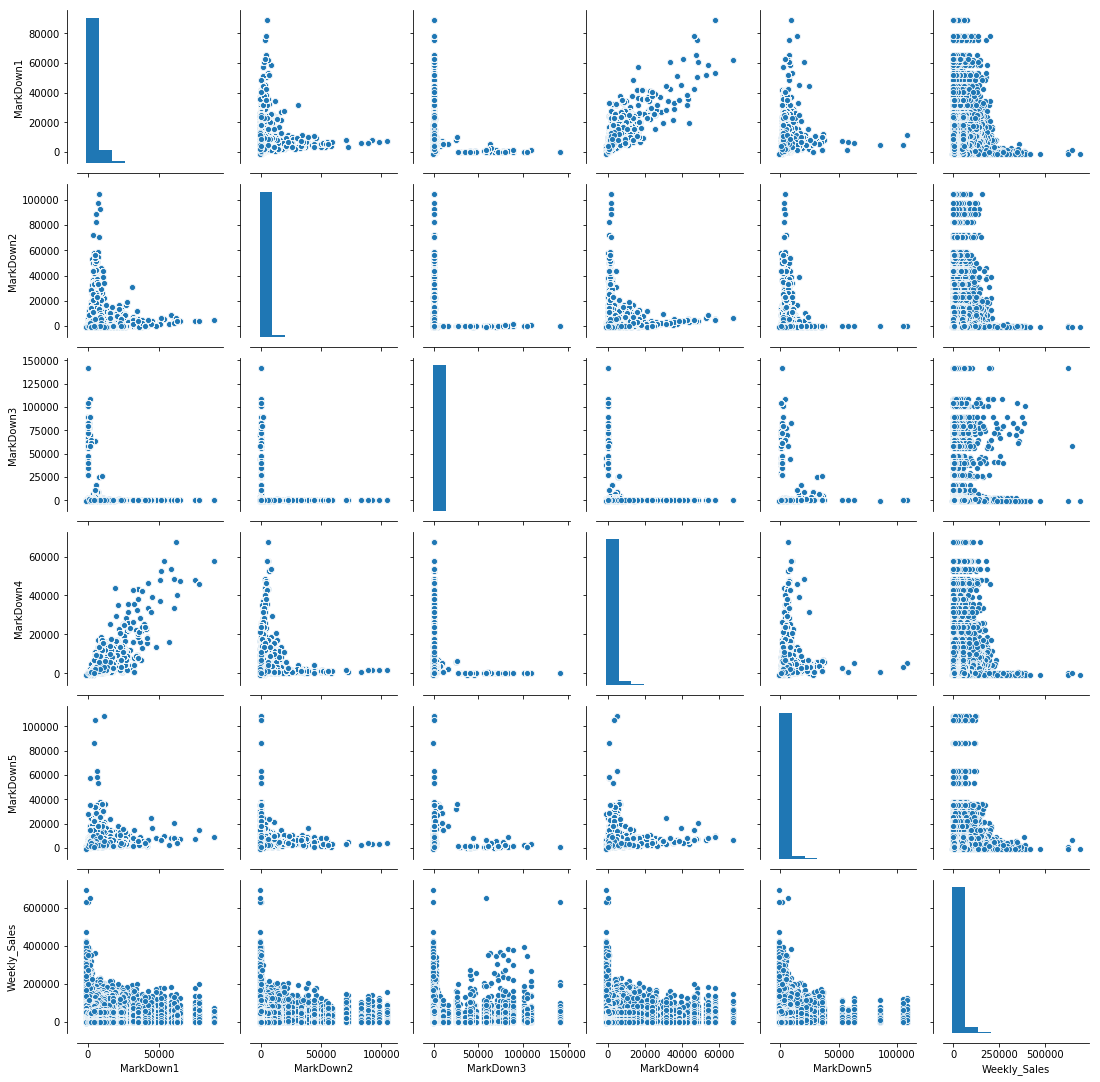

In [362]:
tmp_data = data_noNan[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']]
tmp_data = tmp_data.dropna()
tmp_data.sort_values('MarkDown1')
sns.pairplot(tmp_data)
sns.despine(offset=10)
plt.show()

Comparing these two corelation plots of markdowns show us many things but one of the things it clarifies is, filling the NaNs with an orbitrary value didn't really change outcome considerably!

**Correlation of other numerical columns** [Temperature, Fuel_Price, CPI] with weekly sales and with eachother!

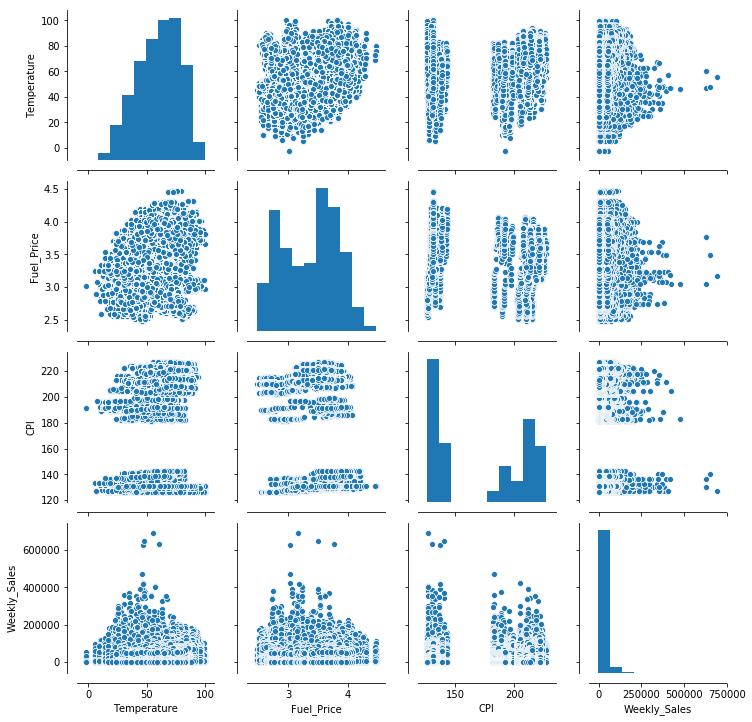

In [209]:
tmp_data = data[['Temperature','Fuel_Price','CPI','Weekly_Sales']]
tmp_data = tmp_data.dropna()
tmp_data.sort_values('Weekly_Sales')
sns.pairplot(tmp_data)
sns.despine(offset=10)
plt.show()

Temperature in average range doesn't seem to effect sales much. But when it was extremely low or extremely high apparently it did lower the sales!

Correlation of all numerical features!

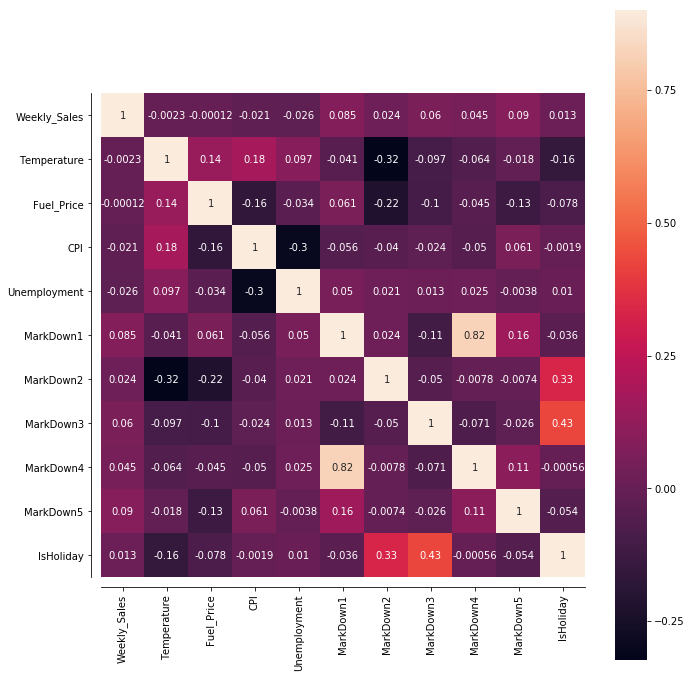

In [235]:
corrmat = data[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','IsHoliday']].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.9, square=True,annot=True)
sns.despine(offset=10)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

1: Holiday's relation with weekly sale isn't worth it, but it's relation with markdown2/3 are somewhat higher. Probably these markdowns are of promotional offers on major holidays like christmas, thanksgiving etc.

2: Markdown 1 and 4 show some sort of linear relation though it shouldn't be, the best guess is the scale/method adopted in both holidays for markdowns was prettymuch similar.

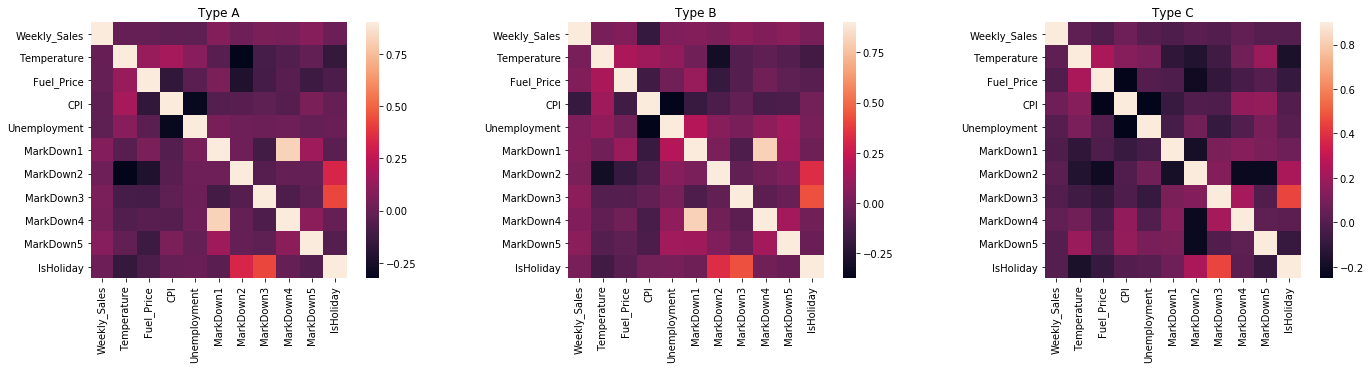

In [252]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))
data_a = data[data['Type']=='A']
corrmat_a = data_a[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','IsHoliday']].corr()
sns.heatmap(corrmat, vmax=.9, square=True,ax=axes[0])
data_b = data[data['Type']=='B']
corrmat_b = data_b[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','IsHoliday']].corr()
sns.heatmap(corrmat_b, vmax=.9, square=True,ax=axes[1])
data_c = data[data['Type']=='C']
corrmat_c = data_c[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','IsHoliday']].corr()
sns.heatmap(corrmat_c, vmax=.9, square=True,ax=axes[2])
plt.tight_layout()
axes[0].set_title('Type A')
axes[1].set_title('Type B')
axes[2].set_title('Type C')
plt.show()

MarkDown1 and MarkDown4 correlation is interesting!

Not much difference is observed in outcome cause of store types, so probably they weren't a important factor.

Let's look at the sale w.r.t Date

Weekly Sales of stores!

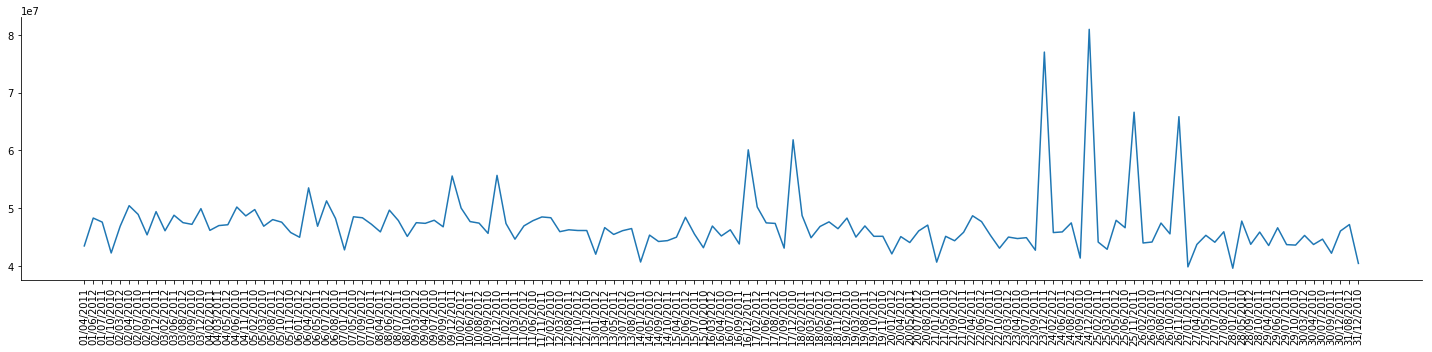

In [418]:
average_sales_week = data.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
average_sales = average_sales_week.sort_values('Weekly_Sales', ascending=False)
plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Monthly sales of stores!

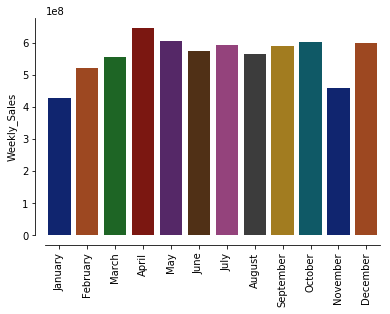

In [302]:
sale_by_month = data.groupby([data['Date'].dt.month])['Weekly_Sales'].sum().reset_index()
months = []
for i in sale_by_month['Date']:
    months.append(calendar.month_name[i])
sns.barplot(data=sale_by_month,x=months,y='Weekly_Sales',palette='dark')
sns.despine(offset=10)
plt.xticks(rotation=90)
plt.show()

April is the month with maximum overall sale of all stores!

###### Let's take a look at total stores and the departments in them!

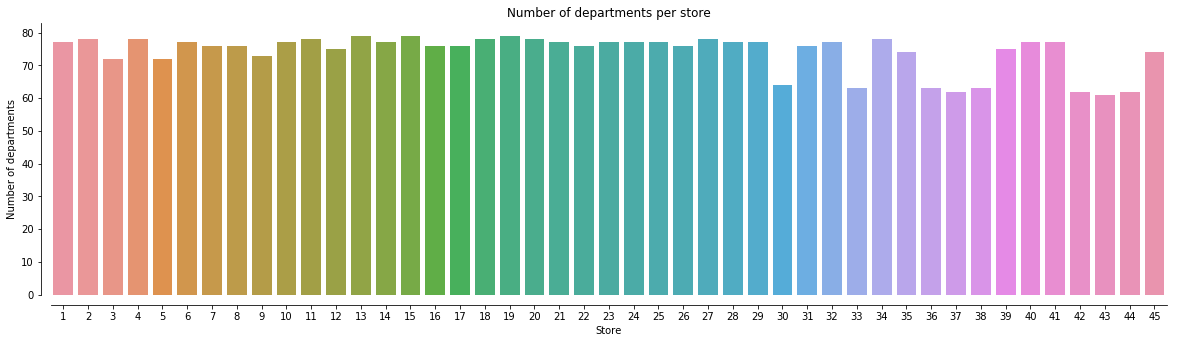

In [354]:
store_department = data.groupby(['Store'])['Dept'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data=store_department,x='Store',y='Dept')
sns.despine(offset=10)
plt.title('Number of departments per store')
plt.ylabel('Number of departments')
plt.show()

As we can see, number of departments per store lie between 60-80!

Sales per store!

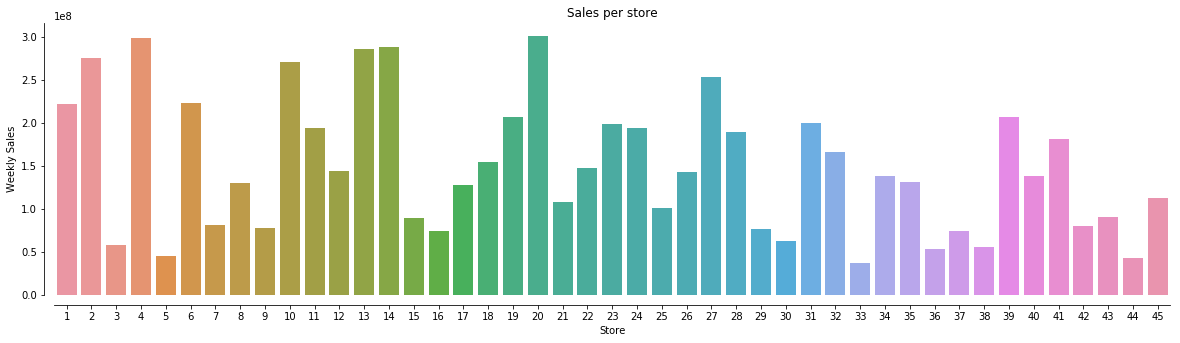

In [359]:
sales_per_store = data.groupby('Store',as_index=False)['Weekly_Sales'].sum()
plt.figure(figsize=(20,5))
sns.barplot(data=sales_per_store,x='Store',y='Weekly_Sales')
sns.despine(offset=10)
plt.title('Sales per store')
plt.ylabel('Weekly Sales')
plt.show()

Now lets look at the stores with maximum sales!

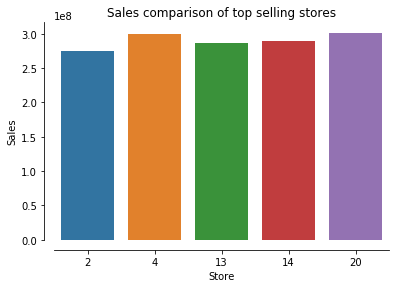

In [361]:
max_sale_stores = sales_per_store.nlargest(5,columns='Weekly_Sales')
sns.barplot(data=max_sale_stores.nlargest(5,columns='Weekly_Sales'),x='Store',y='Weekly_Sales')
plt.title('Sales comparison of top selling stores')
sns.despine(offset=10)
plt.ylabel('Sales')
plt.show()

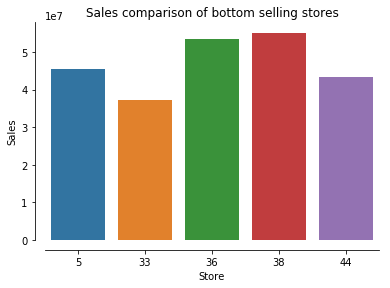

In [16]:
sns.barplot(data=max_sale_stores.nsmallest(5,columns='Weekly_Sales'),x='Store',y='Weekly_Sales')
plt.title('Sales comparison of bottom selling stores')
plt.ylabel('Sales')
sns.despine(offset=10)
plt.show()

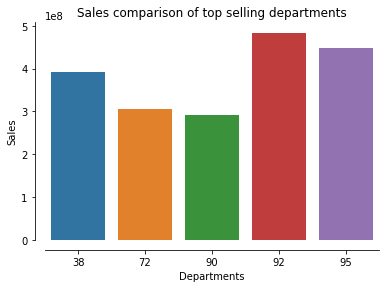

In [417]:
max_department_sales = data.groupby('Dept')['Weekly_Sales'].sum().reset_index().nlargest(5,columns='Weekly_Sales')
sns.barplot(data=max_department_sales,x='Dept',y='Weekly_Sales')
plt.title('Sales comparison of top selling departments')
plt.ylabel('Sales')
plt.xlabel('Departments')
sns.despine(offset=10)
plt.show()

Okay these five departments are the best selling ones but this is not really any useful information unless attributed with the store. So lets plot the top 5 departments of top 5 selling stores!

As we already know the top selling stores! [2,4,13,14,20]

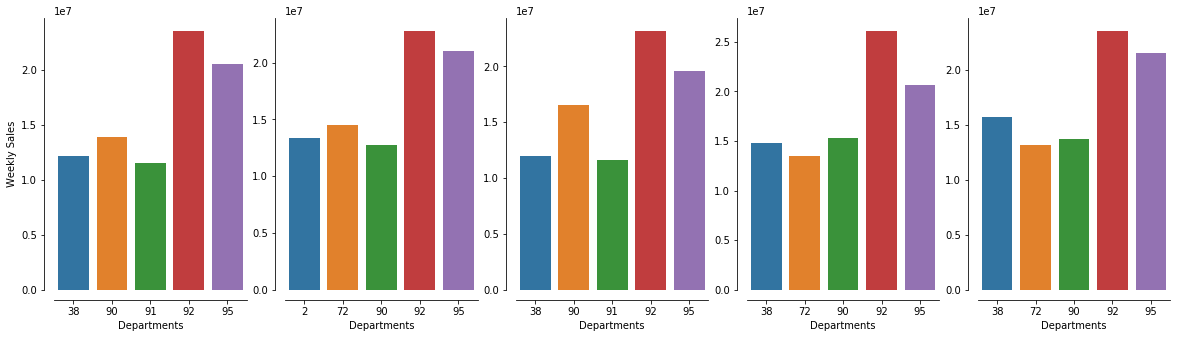

In [338]:
fig, axes = plt.subplots(1,5, figsize=(20, 5))
max_sale_stores_departments_2 = data[data['Store']==2].groupby('Dept')['Weekly_Sales'].sum().reset_index().nlargest(5,columns='Weekly_Sales')
max_sale_stores_departments_4 = data[data['Store']==4].groupby('Dept')['Weekly_Sales'].sum().reset_index().nlargest(5,columns='Weekly_Sales')
max_sale_stores_departments_13 = data[data['Store']==13].groupby('Dept')['Weekly_Sales'].sum().reset_index().nlargest(5,columns='Weekly_Sales')
max_sale_stores_departments_14 = data[data['Store']==14].groupby('Dept')['Weekly_Sales'].sum().reset_index().nlargest(5,columns='Weekly_Sales')
max_sale_stores_departments_20 = data[data['Store']==20].groupby('Dept')['Weekly_Sales'].sum().reset_index().nlargest(5,columns='Weekly_Sales')
sns.barplot(data=max_sale_stores_departments_2,x='Dept',y='Weekly_Sales',ax=axes[0])
sns.barplot(data=max_sale_stores_departments_4,x='Dept',y='Weekly_Sales',ax=axes[1])
sns.barplot(data=max_sale_stores_departments_13,x='Dept',y='Weekly_Sales',ax=axes[2])
sns.barplot(data=max_sale_stores_departments_14,x='Dept',y='Weekly_Sales',ax=axes[3])
sns.barplot(data=max_sale_stores_departments_20,x='Dept',y='Weekly_Sales',ax=axes[4])
sns.despine(offset=10)
for i in range(0,5):
    axes[i].set_xlabel('Departments')
    axes[i].set_ylabel('')
axes[0].set_ylabel('Weekly Sales')
plt.show()

We can see that **92** is consistently most selling department in all stores!

Lets look at the weekly sales of all stores!

We have taken a look at the sales of all stores. Lets see if sales of all stores w.r.t time give us any useful insights!

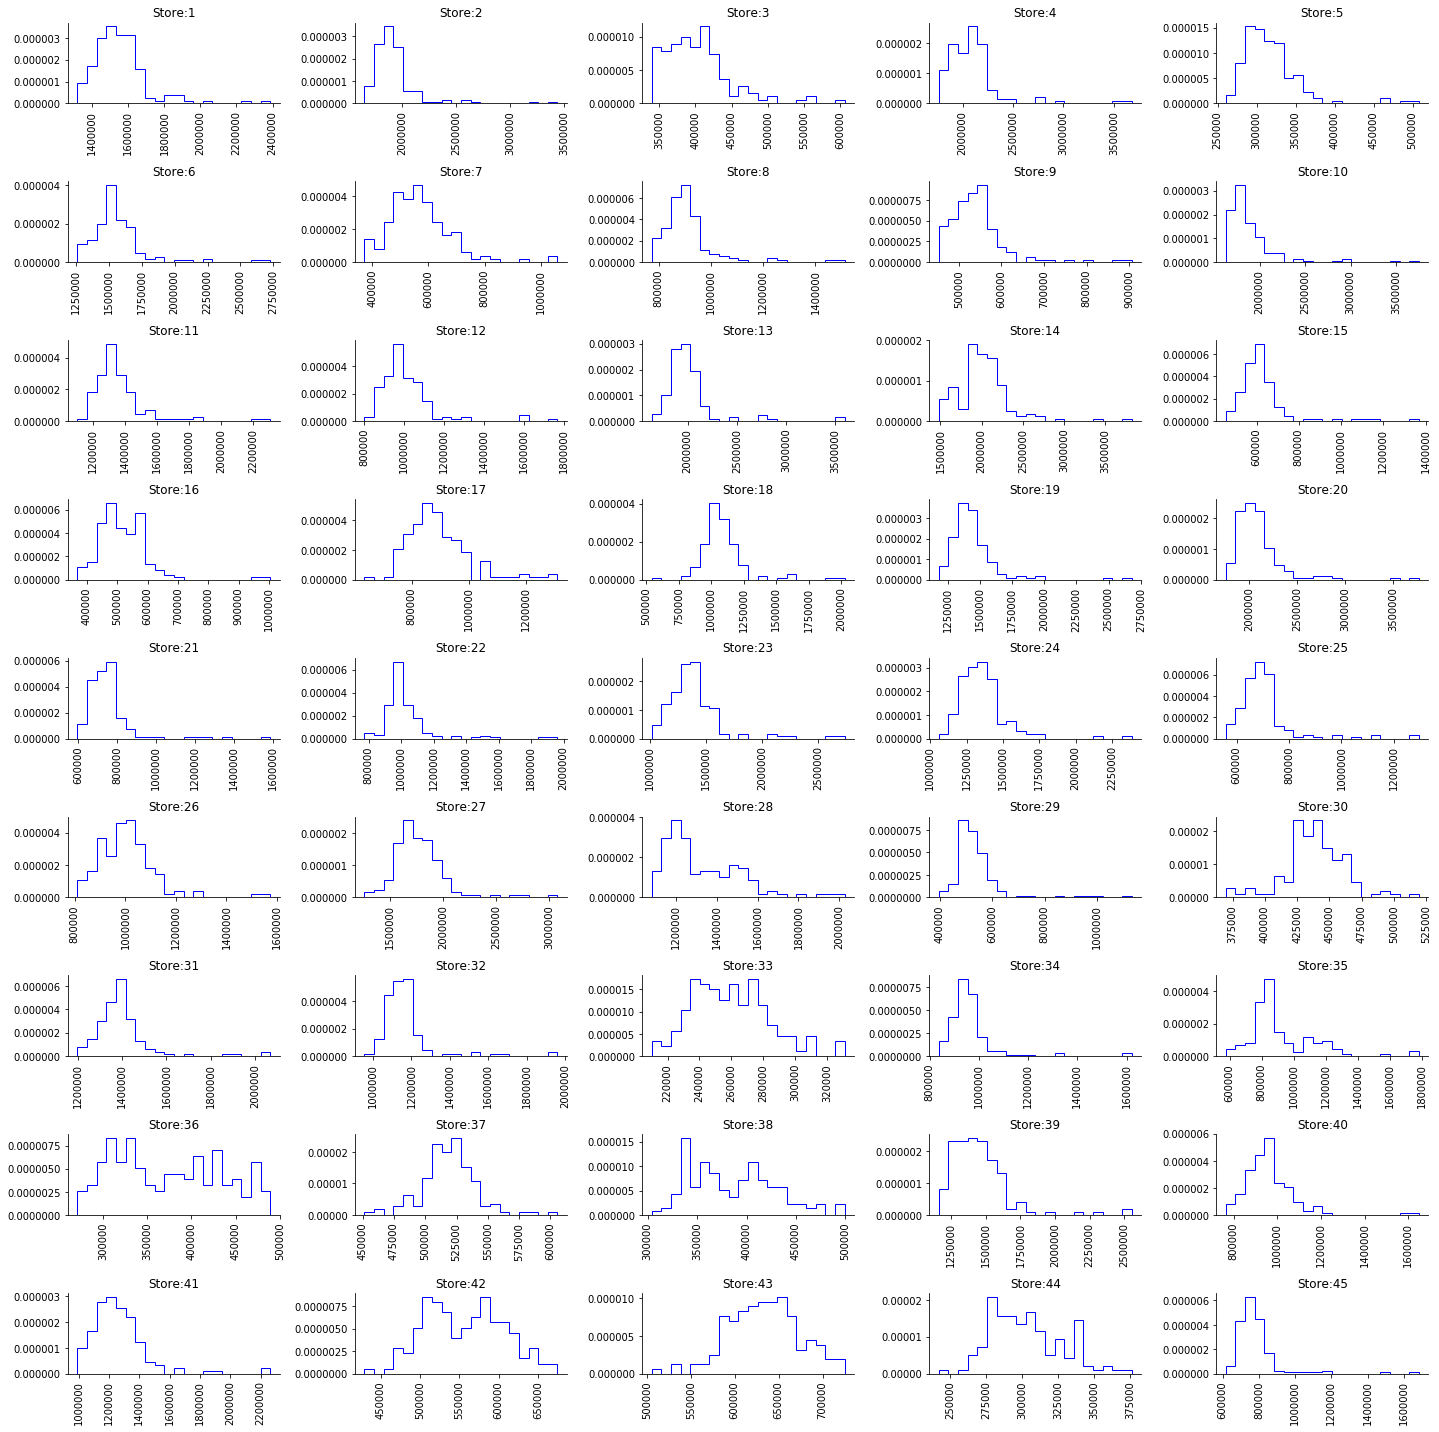

In [441]:
#Test
#Not sure about it
sales_by_store_by_week = data.groupby(['Store','Date'],as_index=False)['Weekly_Sales'].sum()
fig, axes = plt.subplots(9,5,figsize=(20, 20))#, figsize=(20, 20)
i = 1
for row in range(0,9):
    for col in range(0,5):
        axes[row,col].hist(sales_by_store_by_week['Weekly_Sales'].loc[(sales_by_store_by_week['Store'] == i)], 20, color='b', normed=True, histtype='step')
        axes[row,col].set_title('Store:'+str(i))
        for tick in axes[row,col].get_xticklabels():
            tick.set_rotation(90)
        i = i+1
plt.tight_layout()